In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

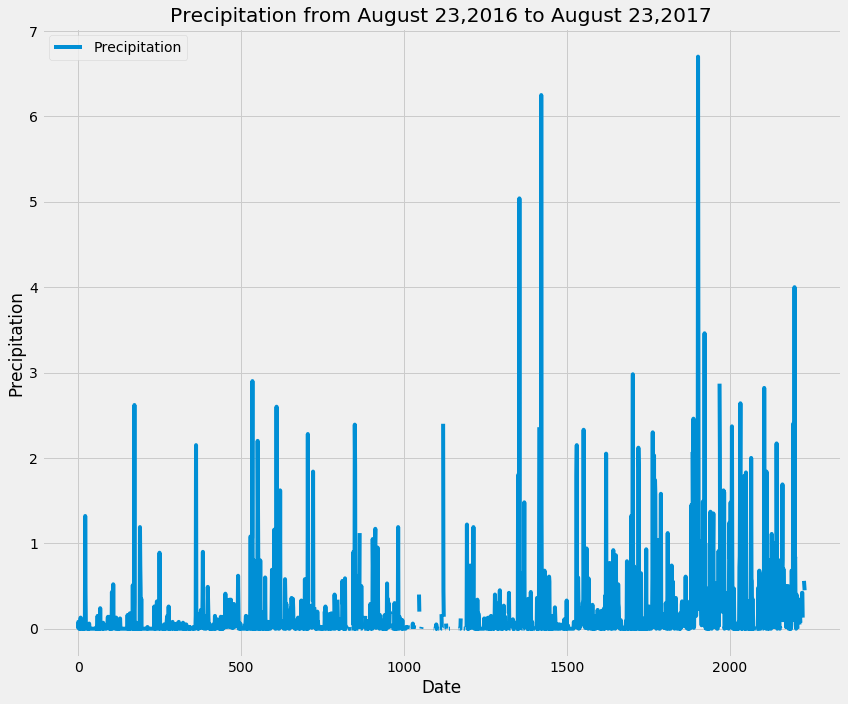

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
lastdate= session.query(measurement.date).order_by(measurement.date.desc()).first()
#lastdate


# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
#year_ago

# Perform a query to retrieve the data and precipitation scores
prcp_data= session.query(func.strftime("%Y-%m-%d", measurement.date), measurement.prcp).\
    filter(func.strftime("%Y-%m-%d",measurement.date) >= dt.date(2016, 8, 23)).all()
#prcp_data

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_data, columns = ['Date', 'Precipitation'])
prcp_df.set_index('Date')

# Sort the dataframe by date
prcp_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=(12,10))
prcp_df.plot(ax=ax,legend=True)


ax.set_xlabel("Date")
ax.set_ylabel("Precipitation")
ax.set_title("Precipitation from August 23,2016 to August 23,2017")
fig.tight_layout()
plt.show()



In [44]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [48]:
# Design a query to show how many stations are available in this dataset?
station_amount = session.query(station.station).count()
station_amount

9

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?

# List the stations and the counts in descending order.

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

In [ ]:

# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [ ]:
session.query(measurement.station, func.sum(measurement.prcp)).\
    filter(func.strftime("%Y",measurement.date) == "2014").\
    group_by(measurement.station).all()